# **Project 1 :Student Performance Analysis and Visualization**
# **Objective**
Create a Python program to analyze and visualize student performance data using concepts
learned in the course, including file handling, data structures, functions, loops, NumPy, and
Pandas.
# **1. Data Collection and Storage**

In [21]:
import pandas as pd


data = {
    "Student Name": ["Nandan", "Nandan", "Nandan", "Sanjiban", "Sanjiban", "Sanjiban", "Sayeda", "Sayeda", "Sayeda"],
    "Student ID": [1, 1, 1, 2, 2, 2, 3, 3, 3],
    "Subject": ["Geomorphology", "Climatology", "GIS", "Geomorphology", "Climatology", "GIS","Geomorphology", "Climatology", "GIS"],
    "Score": [88, 92, 85, 76, 81, 70, 90, 95, 88],
    "Attendance Percentage": [95, 90, 85, 80, 70, 65, 98, 96, 92],
    "Assignment Completion": ["Yes", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes"]
}


df = pd.DataFrame(data)


output_file = "student of GEE.csv"
df.to_csv(output_file, index=False)

print(f"Simulated data saved to '{output_file}'")
print(df)


Simulated data saved to 'student of GEE.csv'
  Student Name  Student ID        Subject  Score  Attendance Percentage  \
0       Nandan           1  Geomorphology     88                     95   
1       Nandan           1    Climatology     92                     90   
2       Nandan           1            GIS     85                     85   
3     Sanjiban           2  Geomorphology     76                     80   
4     Sanjiban           2    Climatology     81                     70   
5     Sanjiban           2            GIS     70                     65   
6       Sayeda           3  Geomorphology     90                     98   
7       Sayeda           3    Climatology     95                     96   
8       Sayeda           3            GIS     88                     92   

  Assignment Completion  
0                   Yes  
1                   Yes  
2                    No  
3                   Yes  
4                    No  
5                    No  
6                   Ye

# **2. Basic Data Handling**

In [24]:
import pandas as pd


def read_csv_file(file_path):
    "Reads the CSV file and returns the DataFrame."
    try:
        data = pd.read_csv(file_path)
        print("CSV file read successfully!")
        print(data.head())
        return data
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None


def modify_data(data):
    """
    Modifies or updates the data.
    Example: Adding a 'Performance' column based on Score.
    """
    if data is not None:

        data['Performance'] = data['Score'].apply(
            lambda x: 'Excellent' if x >= 85 else 'Good' if x >= 70 else 'Needs Improvement'
        )
        print("\nData updated with 'Performance' column:")
        print(data.head())
        return data
    else:
        print("No data to modify.")
        return None


def write_csv_file(data, output_file):
    """
    Writes the updated data to a new CSV file.
    """
    if data is not None:
        data.to_csv(output_file, index=False)
        print(f"\nUpdated data has been written to '{output_file}'")
    else:
        print("No data to write to CSV.")


def main():

    input_file = "student of GEE.csv"
    output_file = "updated student of GEE.csv"


    student_data = read_csv_file(input_file)


    updated_data = modify_data(student_data)


    write_csv_file(updated_data, output_file)


if __name__ == "__main__":
    main()


CSV file read successfully!
  Student Name  Student ID        Subject  Score  Attendance Percentage  \
0       Nandan           1  Geomorphology     88                     95   
1       Nandan           1    Climatology     92                     90   
2       Nandan           1            GIS     85                     85   
3     Sanjiban           2  Geomorphology     76                     80   
4     Sanjiban           2    Climatology     81                     70   

  Assignment Completion  
0                   Yes  
1                   Yes  
2                    No  
3                   Yes  
4                    No  

Data updated with 'Performance' column:
  Student Name  Student ID        Subject  Score  Attendance Percentage  \
0       Nandan           1  Geomorphology     88                     95   
1       Nandan           1    Climatology     92                     90   
2       Nandan           1            GIS     85                     85   
3     Sanjiban          

# **3. Data Analysis and Manipulation**

In [25]:
import pandas as pd


def analyze_scores(data):
    "Calculate average, minimum, and maximum scores for each student."
    analysis = data.groupby('Student Name')['Score'].agg(['mean', 'min', 'max']).reset_index()
    analysis.columns = ['Student Name', 'Average Score', 'Minimum Score', 'Maximum Score']
    print("\nAverage, Minimum, and Maximum Scores per Student:")
    print(analysis)
    return analysis


def identify_low_attendance_or_missing_assignments(data):
    "Identify students with attendance < 75% or missing assignments."
    condition = (data['Attendance Percentage'] < 75) | (data['Assignment Completion'] == 'No')
    low_attendance_or_missing = data[condition]
    print("\nStudents with Attendance < 75% or Missing Assignments:")
    print(low_attendance_or_missing[['Student Name', 'Attendance Percentage', 'Assignment Completion']])
    return low_attendance_or_missing


def filter_failing_students(data, subject, passing_score=50):
    "Filter students who are failing in a specific subject."
    failing_students = data[(data['Subject'] == subject) & (data['Score'] < passing_score)]
    print(f"\nStudents failing in {subject}:")
    print(failing_students[['Student Name', 'Score']])
    return failing_students


def convert_score_to_integer(data):
    "Convert Score column to integer if it is stored as a string."
    if data['Score'].dtype == 'object':
        data['Score'] = data['Score'].astype(int)
        print("\nConverted 'Score' to integer.")
    return data


def main():

    input_file = "student of GEE.csv"
    try:
        data = pd.read_csv(input_file)
        print("Data loaded successfully!")
    except FileNotFoundError:
        print(f"Error: The file '{input_file}' was not found.")
        return


    data = convert_score_to_integer(data)


    analyze_scores(data)


    identify_low_attendance_or_missing_assignments(data)


    filter_failing_students(data, subject='Math')


if __name__ == "__main__":
    main()


Data loaded successfully!

Average, Minimum, and Maximum Scores per Student:
  Student Name  Average Score  Minimum Score  Maximum Score
0       Nandan      88.333333             85             92
1     Sanjiban      75.666667             70             81
2       Sayeda      91.000000             88             95

Students with Attendance < 75% or Missing Assignments:
  Student Name  Attendance Percentage Assignment Completion
2       Nandan                     85                    No
4     Sanjiban                     70                    No
5     Sanjiban                     65                    No

Students failing in Math:
Empty DataFrame
Columns: [Student Name, Score]
Index: []


# **4. Visualization**

Data loaded successfully!


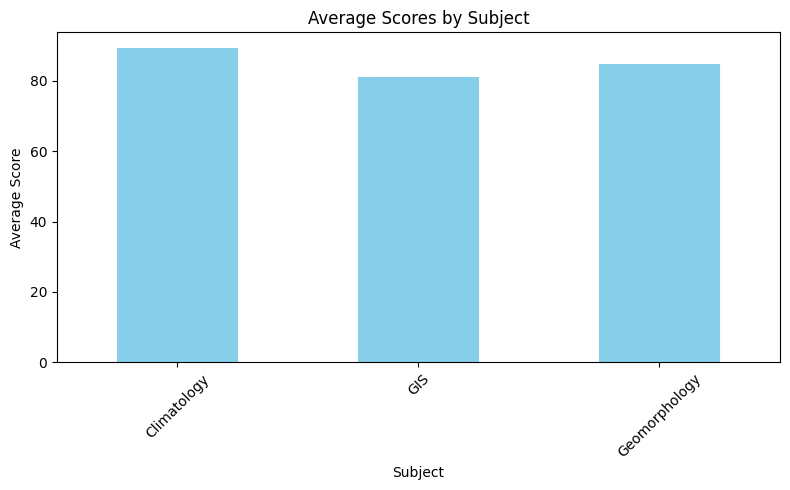

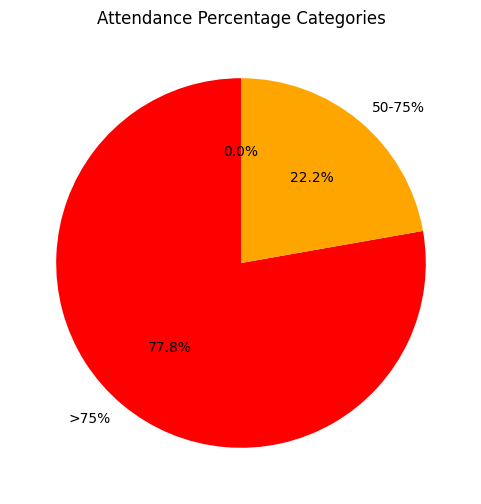

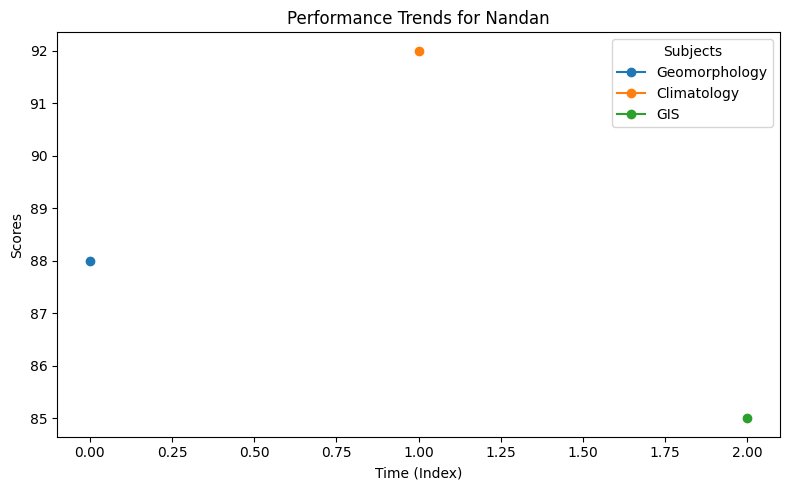

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_scores_by_subject(data):
    "Plots a bar chart of average scores by subject."
    avg_scores = data.groupby('Subject')['Score'].mean()
    avg_scores.plot(kind='bar', color='skyblue', figsize=(8, 5))
    plt.title('Average Scores by Subject')
    plt.xlabel('Subject')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_attendance_pie_chart(data):
    "Displays a pie chart of attendance percentage categories."
    attendance_bins = pd.cut(data['Attendance Percentage'], bins=[0, 50, 75, 100], labels=['<50%', '50-75%', '>75%'])
    attendance_distribution = attendance_bins.value_counts()
    attendance_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=['red', 'orange', 'green'])
    plt.title('Attendance Percentage Categories')
    plt.ylabel('')
    plt.show()


def plot_performance_trends(data, student_name):
    "Creates a line graph showing performance trends over time for a selected student."
    student_data = data[data['Student Name'] == student_name]
    if student_data.empty:
        print(f"No data found for student: {student_name}")
        return

    plt.figure(figsize=(8, 5))
    for subject in student_data['Subject'].unique():
        subject_data = student_data[student_data['Subject'] == subject]
        plt.plot(subject_data.index, subject_data['Score'], marker='o', label=subject)

    plt.title(f'Performance Trends for {student_name}')
    plt.xlabel('Time (Index)')
    plt.ylabel('Scores')
    plt.legend(title="Subjects")
    plt.tight_layout()
    plt.show()


def main():

    input_file = "student of GEE.csv"
    try:
        data = pd.read_csv(input_file)
        print("Data loaded successfully!")
    except FileNotFoundError:
        print(f"Error: The file '{input_file}' was not found.")
        return


    plot_average_scores_by_subject(data)


    plot_attendance_pie_chart(data)


    student_name = "Nandan"
    plot_performance_trends(data, student_name)


if __name__ == "__main__":
    main()


# **5. Applying Functions and Logic**

In [30]:
import pandas as pd


def calculate_aggregate_scores(data):
    "Calculates the total and average scores for each student."
    aggregate_scores = data.groupby('Student Name')['Score'].agg(['sum', 'mean']).reset_index()
    aggregate_scores.columns = ['Student Name', 'Total Score', 'Average Score']
    print("\nAggregate Scores for Each Student:")
    print(aggregate_scores)
    return aggregate_scores


def determine_grades(data):
    "Determines grades based on average scores."
    def grade_calculator(score):
        if score >= 85:
            return 'A+'
        elif score >= 70:
            return 'A'
        elif score >= 50:
            return 'B'
        else:
            return 'Fail'

    data['Grade'] = data['Average Score'].apply(grade_calculator)
    print("\nGrades for Each Student:")
    print(data[['Student Name', 'Average Score', 'Grade']])
    return data


def generate_performance_reports(data, detailed=False):
    "Generates a performance report for each student."
    print("\nStudent Performance Reports:")
    for _, row in data.iterrows():
        report = f"""
        Student Name: {row['Student Name']}
        Total Score: {row['Total Score']}
        Average Score: {row['Average Score']:.2f}
        Grade: {row['Grade']}
        """
        print(report)
        if detailed:
            print("Detailed Subject Scores:")
            student_subjects = original_data[original_data['Student Name'] == row['Student Name']]
            print(student_subjects[['Subject', 'Score']])
            print("-" * 40)


def main():

    input_file = "student of GEE.csv"
    try:
        global original_data
        original_data = pd.read_csv(input_file)
        print("Data loaded successfully!")
    except FileNotFoundError:
        print(f"Error: The file '{input_file}' was not found.")
        return


    aggregate_scores = calculate_aggregate_scores(original_data)


    merged_data = pd.merge(aggregate_scores, original_data[['Student Name']].drop_duplicates(), on='Student Name')


    graded_data = determine_grades(merged_data)


    generate_performance_reports(graded_data, detailed=True)


if __name__ == "__main__":
    main()


Data loaded successfully!

Aggregate Scores for Each Student:
  Student Name  Total Score  Average Score
0       Nandan          265      88.333333
1     Sanjiban          227      75.666667
2       Sayeda          273      91.000000

Grades for Each Student:
  Student Name  Average Score Grade
0       Nandan      88.333333    A+
1     Sanjiban      75.666667     A
2       Sayeda      91.000000    A+

Student Performance Reports:

        Student Name: Nandan
        Total Score: 265
        Average Score: 88.33
        Grade: A+
        
Detailed Subject Scores:
         Subject  Score
0  Geomorphology     88
1    Climatology     92
2            GIS     85
----------------------------------------

        Student Name: Sanjiban
        Total Score: 227
        Average Score: 75.67
        Grade: A
        
Detailed Subject Scores:
         Subject  Score
3  Geomorphology     76
4    Climatology     81
5            GIS     70
----------------------------------------

        Student Na

# **6. Advanced Features (Optional for Bonus Marks)**

In [37]:
import pandas as pd
import re


def log_execution(func):
    def wrapper(*args, **kwargs):
        print(f"LOG: Executing function: {func.__name__}")
        try:
            result = func(*args, **kwargs)
            print(f"LOG: Function {func.__name__} executed successfully.\n")
            return result
        except Exception as e:
            print(f"ERROR: An error occurred in function {func.__name__}: {e}")
            raise
    return wrapper


@log_execution
def validate_student_ids(data):
    """
    Validates student IDs using a specific pattern: only integers (1, 2, 3, etc.).
    """
    pattern = r"^\d+$"  # Pattern for numeric IDs
    invalid_ids = data[~data['Student ID'].astype(str).str.match(pattern)]
    if not invalid_ids.empty:
        print("Invalid Student IDs found:")
        print(invalid_ids[['Student Name', 'Student ID']])
    else:
        print("All Student IDs are valid.")
    return invalid_ids


@log_execution
def load_csv(file_path):
    """
    Loads a CSV file, handling file-not-found errors.
    """
    try:
        data = pd.read_csv(file_path)
        print(f"File '{file_path}' loaded successfully!")
        return data
    except FileNotFoundError:
        print(f"ERROR: The file '{file_path}' was not found.")
        raise
    except pd.errors.EmptyDataError:
        print(f"ERROR: The file '{file_path}' is empty.")
        raise


@log_execution
def analyze_scores(data):
    """
    Calculates average scores for students, handling division by zero errors.
    """
    try:
        averages = data.groupby('Student Name')['Score'].mean().reset_index()
        averages.columns = ['Student Name', 'Average Score']
        print("\nAverage Scores per Student:")
        print(averages)
        return averages
    except ZeroDivisionError:
        print("ERROR: Division by zero encountered in score analysis.")
        return None


@log_execution
def save_csv(data, output_file):
    """
    Saves the DataFrame to a new CSV file.
    """
    try:
        data.to_csv(output_file, index=False)
        print(f"Data successfully saved to '{output_file}'.")
    except Exception as e:
        print(f"ERROR: An error occurred while saving the file: {e}")
        raise


def main():

    data = {
        "Student Name": ["Nandan", "Sanjiban", "Sayeda"],
        "Student ID": ["1", "2", "3"],  # "STU-3" is invalid for testing
        "Subject": ["Geomorphology", "Climatology", "GIS"],
        "Score": [88, 76, 90],
        "Attendance Percentage": [95, 70, 98]
    }


    file_path = "student_data.csv"
    pd.DataFrame(data).to_csv(file_path, index=False)
    print(f"Simulated data saved to '{file_path}'.\n")


    try:
        student_data = load_csv(file_path)
    except Exception:
        return


    invalid_ids = validate_student_ids(student_data)


    if not invalid_ids.empty:
        print("Please correct the student IDs before proceeding.")
        return


    try:
        analyzed_data = analyze_scores(student_data)
    except Exception:
        return


    output_file = "analyzed_student_data.csv"
    if analyzed_data is not None:
        save_csv(analyzed_data, output_file)

if __name__ == "__main__":
    main()


Simulated data saved to 'student_data.csv'.

LOG: Executing function: load_csv
File 'student_data.csv' loaded successfully!
LOG: Function load_csv executed successfully.

LOG: Executing function: validate_student_ids
All Student IDs are valid.
LOG: Function validate_student_ids executed successfully.

LOG: Executing function: analyze_scores

Average Scores per Student:
  Student Name  Average Score
0       Nandan           88.0
1     Sanjiban           76.0
2       Sayeda           90.0
LOG: Function analyze_scores executed successfully.

LOG: Executing function: save_csv
Data successfully saved to 'analyzed_student_data.csv'.
LOG: Function save_csv executed successfully.



# **7. Interactive Console Input/Output**

In [42]:
import pandas as pd
import os


file_path = "student_data.csv"


def load_or_create_file():
    if os.path.exists(file_path):
        print(f"Loading data from {file_path}...\n")
        return pd.read_csv(file_path)
    else:
        print(f"File {file_path} not found. Creating a new one...\n")
        data = pd.DataFrame(columns=["Student Name", "Student ID", "Subject", "Score", "Attendance Percentage", "Assignment Completion"])
        data.to_csv(file_path, index=False)
        return data


def save_to_file(data):
    data.to_csv(file_path, index=False)
    print(f"Data saved to {file_path}.\n")


def add_student(data):
    print("Adding a new student:")
    student_name = input("Enter student name: ").strip()
    student_id = input("Enter student ID (must be numeric): ").strip()
    if not student_id.isdigit():
        print("Invalid Student ID. It must be numeric.")
        return data
    subjects = input("Enter subjects (comma-separated): ").strip().split(',')
    new_entries = []
    for subject in subjects:
        score = input(f"Enter score for {subject.strip()}: ").strip()
        attendance = input(f"Enter attendance percentage for {subject.strip()}: ").strip()
        assignment_completion = input(f"Assignment completed for {subject.strip()}? (Yes/No): ").strip()
        new_entries.append({
            "Student Name": student_name,
            "Student ID": student_id,
            "Subject": subject.strip(),
            "Score": int(score),
            "Attendance Percentage": float(attendance),
            "Assignment Completion": assignment_completion
        })
    new_data = pd.DataFrame(new_entries)
    data = pd.concat([data, new_data], ignore_index=True)
    print("Student added successfully!\n")
    return data


def search_student(data):
    print("Search for a student:")
    search_type = input("Search by (name/ID): ").strip().lower()
    if search_type == "name":
        name = input("Enter the student's name: ").strip()
        result = data[data["Student Name"].str.contains(name, case=False, na=False)]
    elif search_type == "id":
        student_id = input("Enter the student's ID: ").strip()
        result = data[data["Student ID"] == student_id]
    else:
        print("Invalid search type. Please enter 'name' or 'ID'.")
        return
    if result.empty:
        print("No student found matching the search criteria.\n")
    else:
        print("Search Results:")
        print(result, "\n")


def update_student(data):
    print("Update a student's data:")
    student_id = input("Enter the student ID: ").strip()
    subject = input("Enter the subject to update: ").strip()
    student_row = data[(data["Student ID"] == student_id) & (data["Subject"].str.contains(subject, case=False, na=False))]
    if student_row.empty:
        print("No matching student or subject found.\n")
        return data
    print("Current Data:")
    print(student_row, "\n")
    choice = input("What would you like to update? (score/attendance): ").strip().lower()
    if choice == "score":
        new_score = input("Enter the new score: ").strip()
        data.loc[student_row.index, "Score"] = int(new_score)
        print("Score updated successfully!\n")
    elif choice == "attendance":
        new_attendance = input("Enter the new attendance percentage: ").strip()
        data.loc[student_row.index, "Attendance Percentage"] = float(new_attendance)
        print("Attendance updated successfully!\n")
    else:
        print("Invalid choice. Please enter 'score' or 'attendance'.")
    return data


def main():
    data = load_or_create_file()
    while True:
        print("Menu:")
        print("1. Add a new student")
        print("2. Search for a student")
        print("3. Update a student's data")
        print("4. Exit")
        choice = input("Enter your choice: ")
        if choice == "1":
            data = add_student(data)
            save_to_file(data)
        elif choice == "2":
            search_student(data)
        elif choice == "3":
            data = update_student(data)
            save_to_file(data)
        elif choice == "4":
            print("Exiting program. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.\n")

if __name__ == "__main__":
    main()


Loading data from student_data.csv...

Menu:
1. Add a new student
2. Search for a student
3. Update a student's data
4. Exit
Enter your choice: 1
Adding a new student:
Enter student name: Nandan Rudra
Enter student ID (must be numeric): 1
Enter subjects (comma-separated): GIS
Enter score for GIS: 99
Enter attendance percentage for GIS: 100
Assignment completed for GIS? (Yes/No): yes
Student added successfully!

Data saved to student_data.csv.

Menu:
1. Add a new student
2. Search for a student
3. Update a student's data
4. Exit
Enter your choice: 1
Adding a new student:
Enter student name: Sayeda Muntahrin
Enter student ID (must be numeric): 2
Enter subjects (comma-separated): GIS
Enter score for GIS: 98
Enter attendance percentage for GIS: 100
Assignment completed for GIS? (Yes/No): yes
Student added successfully!

Data saved to student_data.csv.

Menu:
1. Add a new student
2. Search for a student
3. Update a student's data
4. Exit
Enter your choice: 4
Exiting program. Goodbye!
